In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d0145feb25bde773b9c7289068677b3a6a41500daa9bd622c0bcaa9085f3f094
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [6]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

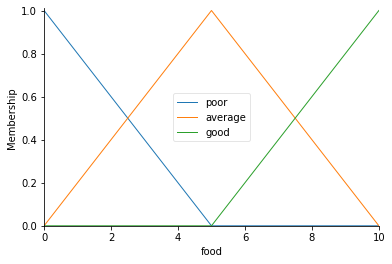

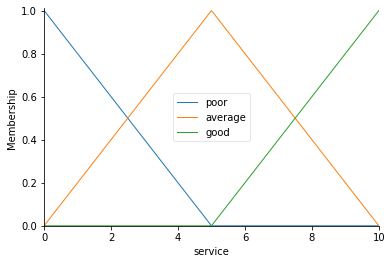

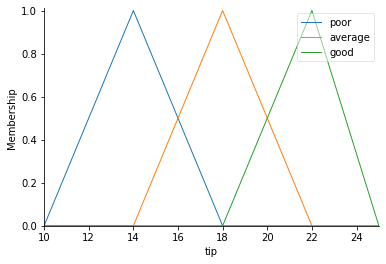

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as control
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['poor'] = fuzz.trimf(tip.universe,[10,14,18])
tip['average'] = fuzz.trimf(tip.universe,[14,18,22])
tip['good'] = fuzz.trimf(tip.universe,[18,22,25])
food.view()   
service.view()
tip.view()

18.28061374464992


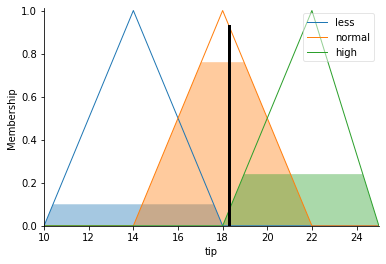

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as control
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['high'] = fuzz.trimf(tip.universe,[18,22,25])
rule1= ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3= ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4= ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5= ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6= ctrl.Rule(food['average']&service['good'],tip['high'])
rule7= ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8= ctrl.Rule(food['good']&service['average'],tip['high'])
rule9= ctrl.Rule(food['good']&service['good'],tip['high'])
tipping_rule=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_rule)
tipping.input['food']=6.2
tipping.input['service']=4.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(0,11,1),'')
rice = ctrl.Antecedent(np.arange(0,11,1),'')
tip = ctrl.Consequent(np.arange(10,26,1),'')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
rule1= ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3= ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4= ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5= ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6= ctrl.Rule(food['average']&service['good'],tip['much'])
rule7= ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8= ctrl.Rule(food['good']&service['average'],tip['much'])
rule9= ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_rule=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_rule)
tipping.input['food']=6.2
tipping.input['service']=7.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)